The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

import sys
sys.path += ['../../../easyXRD']

In [4]:
import easyxrd



Checking required packages:

---numpy package with version 1.26.4 is available and imported 
---pyFAI package with version 2024.5.0 is available and imported 
---xarray package with version 2024.3.0 is available and imported 
---pymatgen package with version 2024.5.1 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---scipy package with version 1.13.0 is available and imported 
---pandas package with version 2.2.2 is available and imported 
---fabio package with version 2024.4.0 is available and imported 
---mp_api package with version 0.41.2 is available and imported 


Imported pysuli with following configuration:



In [5]:
from easyxrd.core import exrd

In [6]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [7]:
# we use pyFAI for integrations: https://pyfai.readthedocs.io/en/v2023.1/
# It there exists a poni file and mask, we can load them like this:
import pyFAI,fabio

ai_file = 'tiff_files/_calibration.poni'
mask_file = 'tiff_files/_mask.edf'

ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


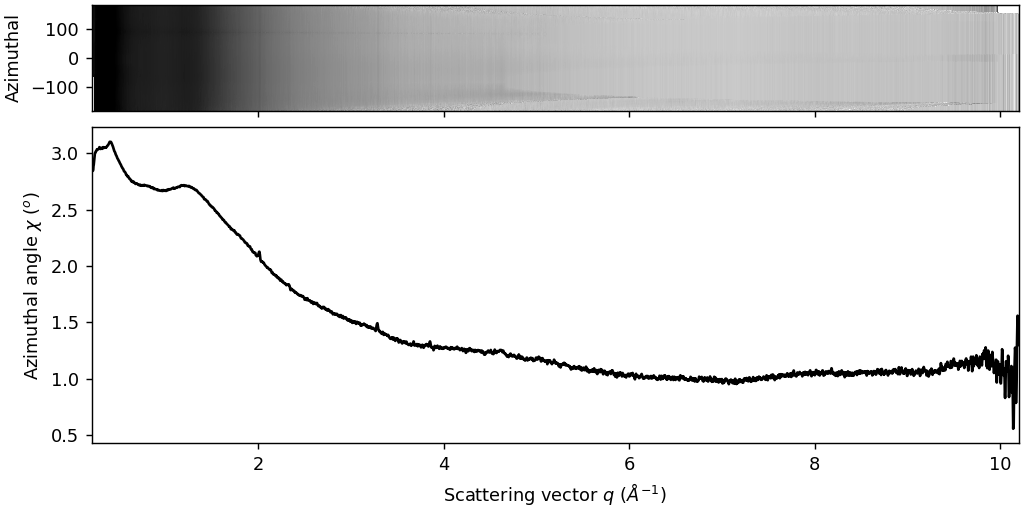

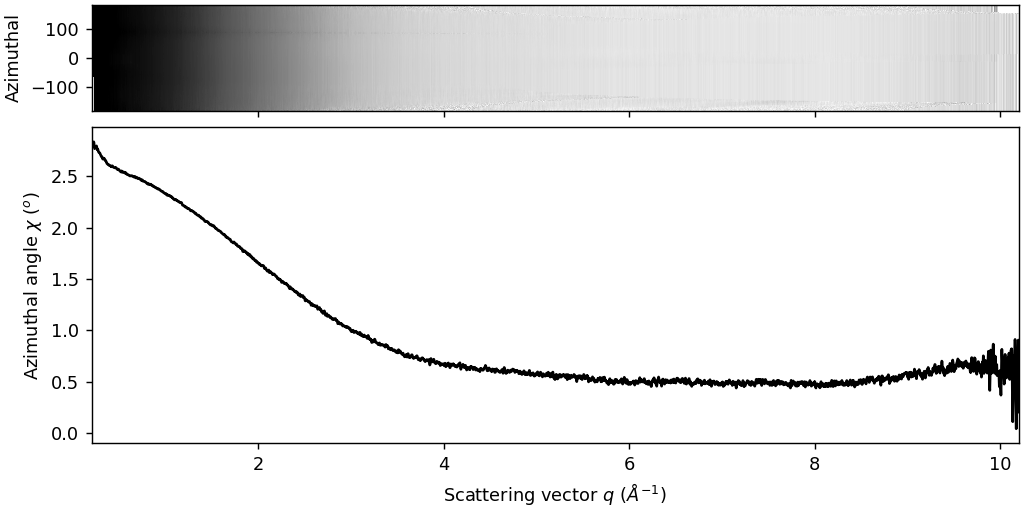

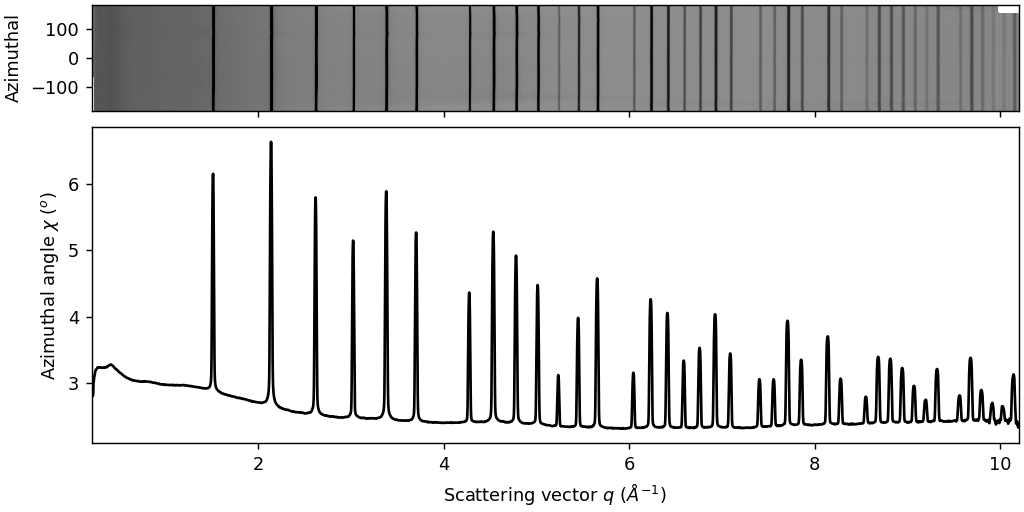

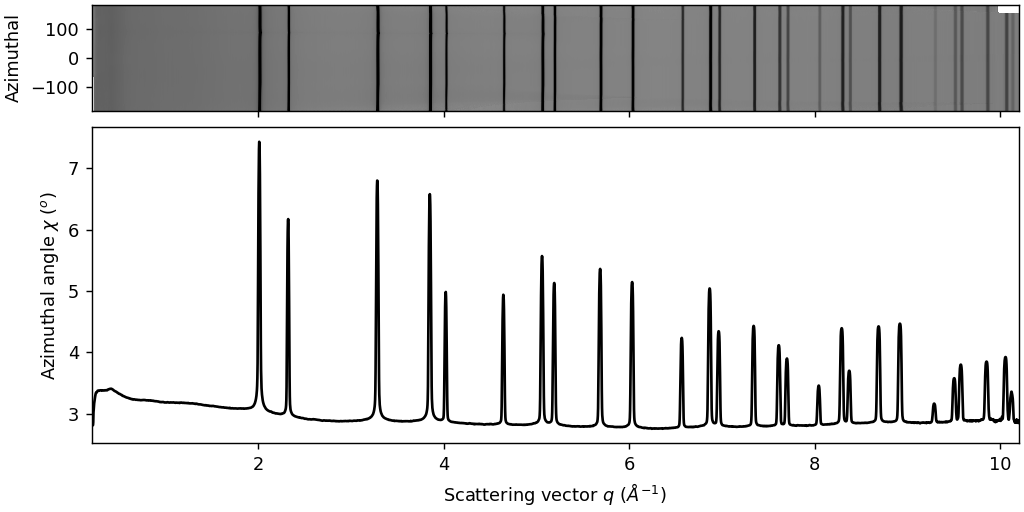

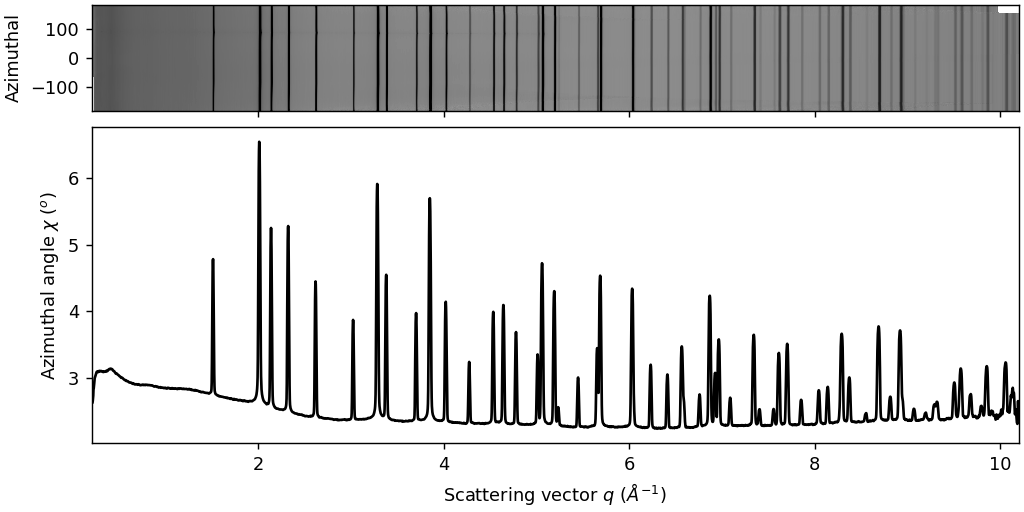

In [8]:
sample_Kapton = exrd()
sample_Kapton.load_xrd_data(from_tiff_file='tiff_files/Kapton.tiff',
                            ai = ai,
                            mask = mask,
                            radial_range=(0.2,10.2),
                            plot=True
                            )

sample_Air = exrd()
sample_Air.load_xrd_data(from_tiff_file='tiff_files/Air_scattering.tiff',
                            ai = ai,
                            mask = mask,
                            radial_range=(0.2,10.2),
                            plot=True
                            )

sample_LaB6 = exrd()
sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6.tiff',
                            ai = ai,
                            mask = mask,
                            radial_range=(0.2,10.2),
                            plot=True
                            )

sample_CeO2 = exrd()
sample_CeO2.load_xrd_data(from_tiff_file='tiff_files/NIST-CeO2.tiff',
                            ai = ai,
                            mask = mask,
                            radial_range=(0.2,10.2),
                            plot=True
                            )

sample_mix = exrd()
sample_mix.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6-CeO2-mix.tiff',
                            ai = ai,
                            mask = mask,
                            radial_range=(0.2,10.2),
                            plot=True
                            )




# sample = exrd()
# sample.load_xrd_data(
#     from_txt_file='integrated/NIST-LaB6.xy',
#     from_txt_file_wavelength_in_angst=0.182,

#                             )

phases_LaB6 = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_CeO2 = [
        {"mp_id":'none', "cif":'_cifs/CeO2_a=5.4113_NIST_value.cif', "label":"CeO2", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_mix = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/CeO2_a=5.4113_NIST_value.cif', "label":"CeO2", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]


Rwp from 1st refinement is = 5.989 
 

Background is refined. Rwp is now 5.891 (was 5.989)


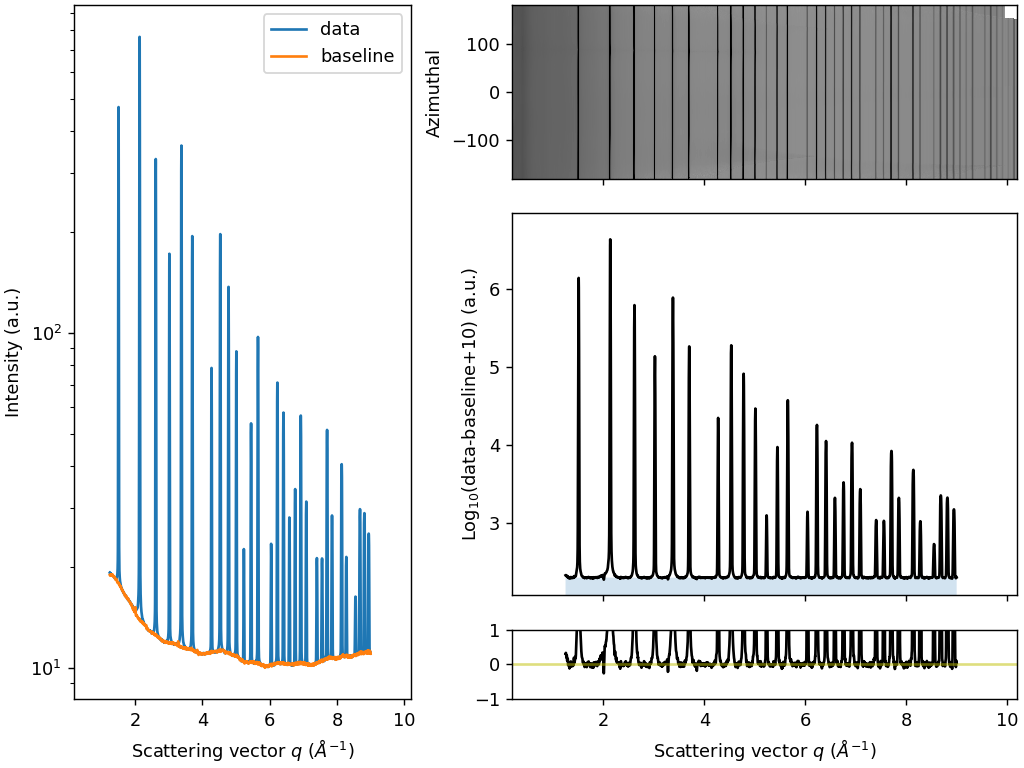

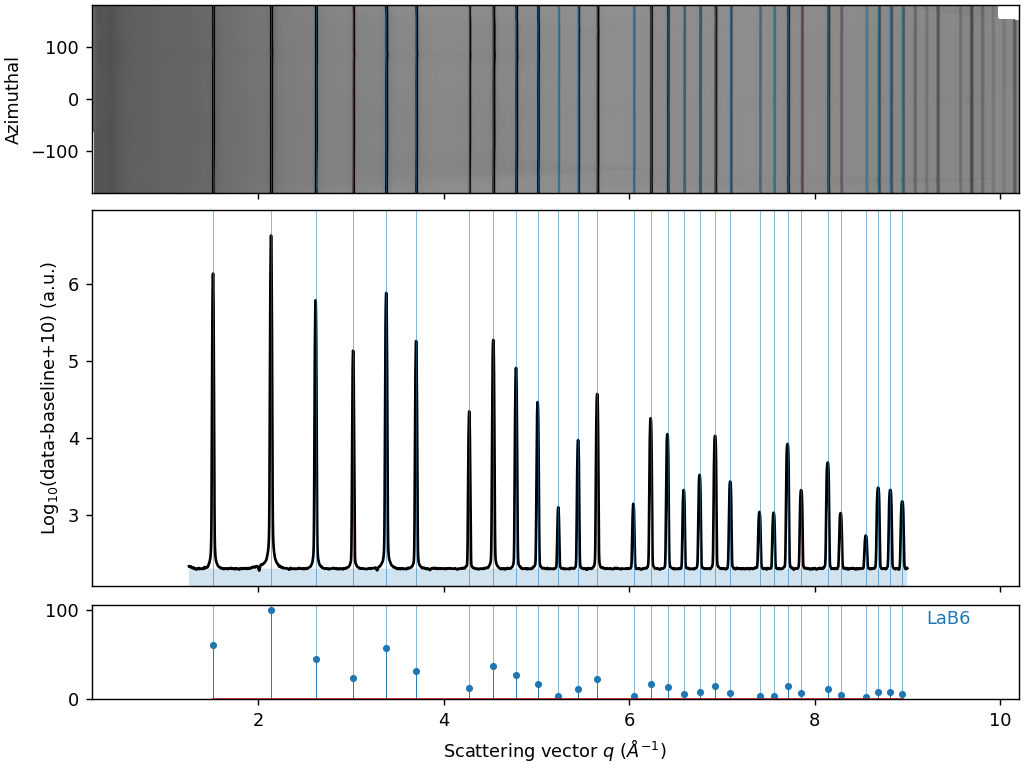

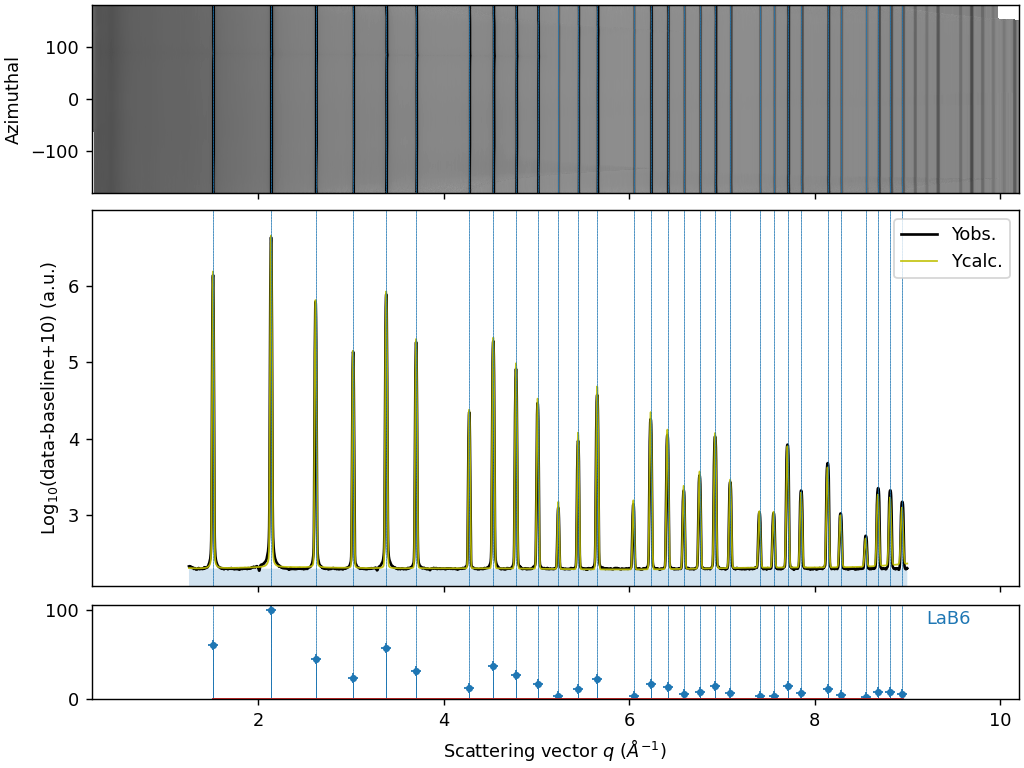

In [10]:
sample_LaB6.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    roi_radial_range=[1.25,9.25],
                    # roi_azimuthal_range=[0,90],
                    plot=True)

sample_LaB6.load_phases(phases=phases_LaB6,plot=True)

sample_LaB6.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample_LaB6.refine_background()


# for par in ['U', 'V', 'W', 'Y', 'Zero']:
#     sample.refine_inst_parameters(inst_pars_to_refine=[par])
# sample.refine_background()

# sample.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W', 'Y', 'Zero'])
# sample.refine_background()


# for par in ['U', 'V', 'W', 'Y', 'Zero']:
#     sample.refine_inst_parameters(inst_pars_to_refine=[par])
# sample.refine_background()

# sample.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W', 'Y', 'Zero'])
# sample.refine_background()

# for par in ['U', 'V', 'W', 'Y', 'Zero']:
#     sample.refine_inst_parameters(inst_pars_to_refine=[par])
# sample.refine_background()

# sample.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W', 'Y', 'Zero'])
# sample.refine_background()


# for par in ['U', 'V', 'W', 'Y', 'Zero']:
#     sample.refine_inst_parameters(inst_pars_to_refine=[par])
# sample.refine_background()

# sample.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W', 'Y', 'Zero'])
# sample.refine_background()



sample_LaB6.plot_refinement()


Rwp from 1st refinement is = 12.260 
 

Background is refined. Rwp is now 12.118 (was 12.260)

Size broadening of all phases are refined. Rwp is now 11.985 (was 12.118)

Strain broadening of all phases are refined. Rwp is now 12.032 (was 11.985)


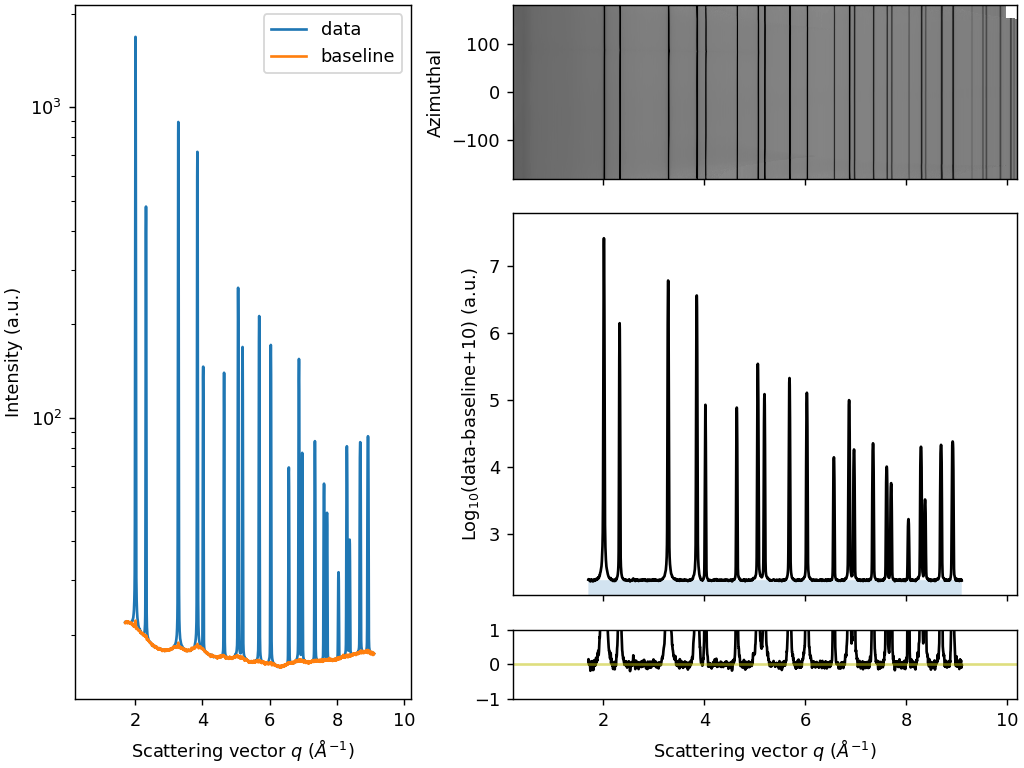

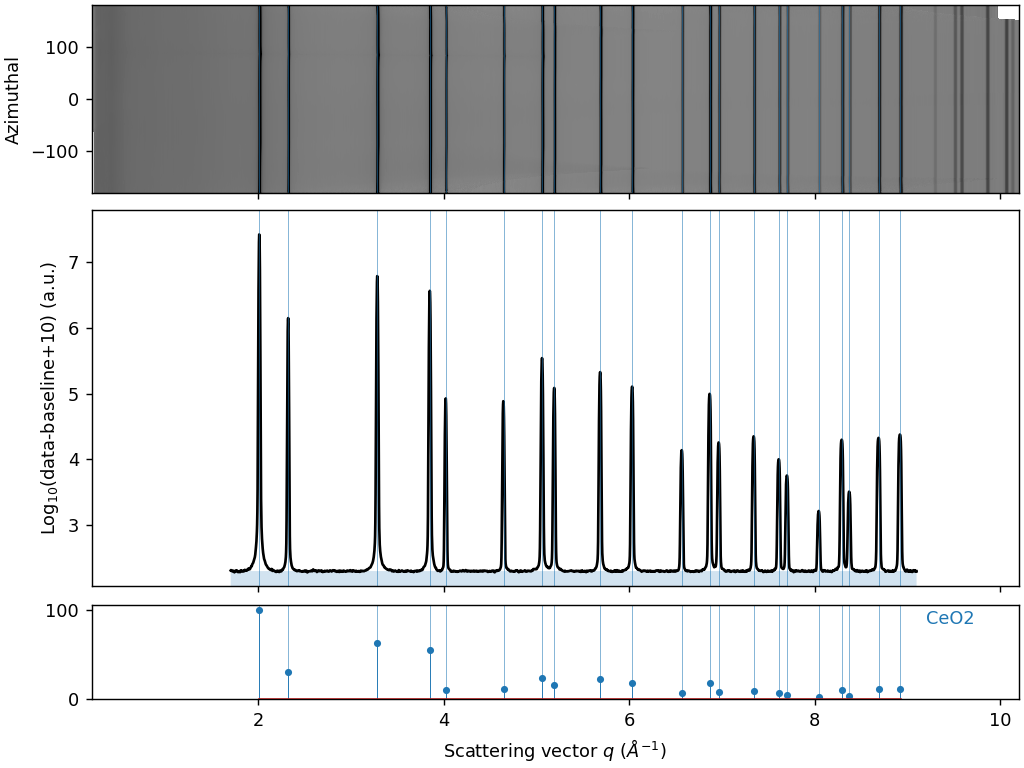

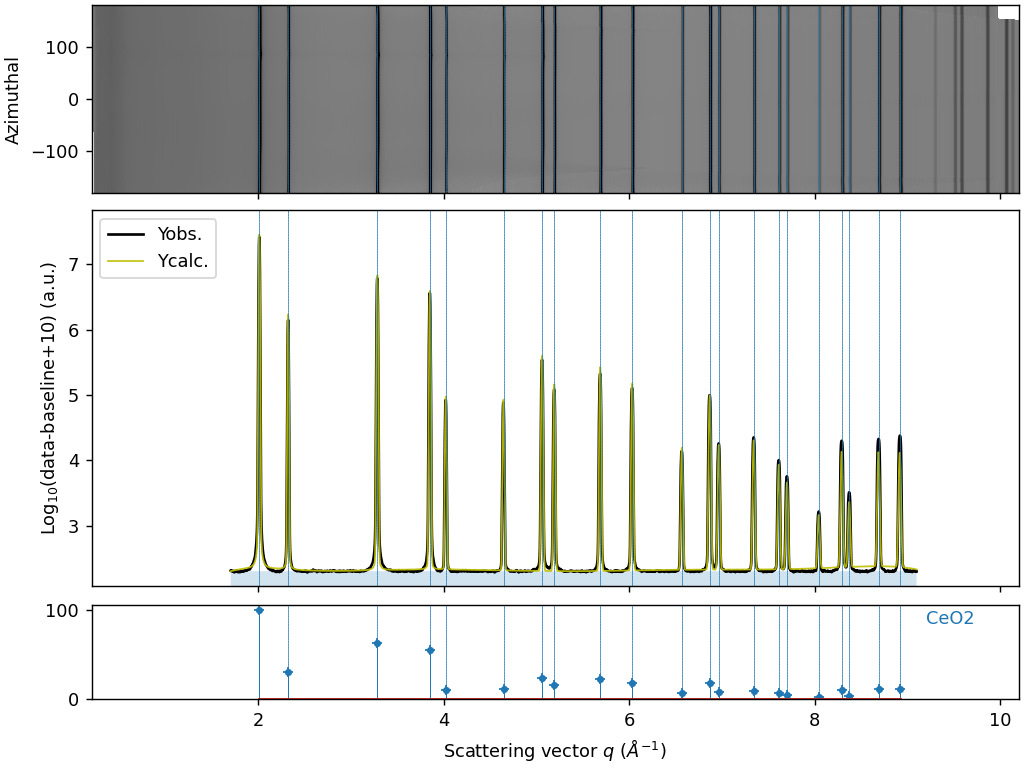

In [14]:

sample_CeO2.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    roi_radial_range=[1.7,9.1],
                    # roi_azimuthal_range=[0,90],
                    plot=True)

sample_CeO2.load_phases(phases=phases_CeO2,plot=True)


sample_CeO2.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
# sample.set_LeBail()

sample_CeO2.refine_background()
sample_CeO2.refine_size_broadening()
sample_CeO2.refine_strain_broadening()

sample_CeO2.plot_refinement()


Rwp from 1st refinement is = 11.019 
 

Background is refined. Rwp is now 10.945 (was 11.019)

Size broadening of all phases are refined. Rwp is now 10.774 (was 10.945)

Strain broadening of all phases are refined. Rwp is now 10.807 (was 10.774)


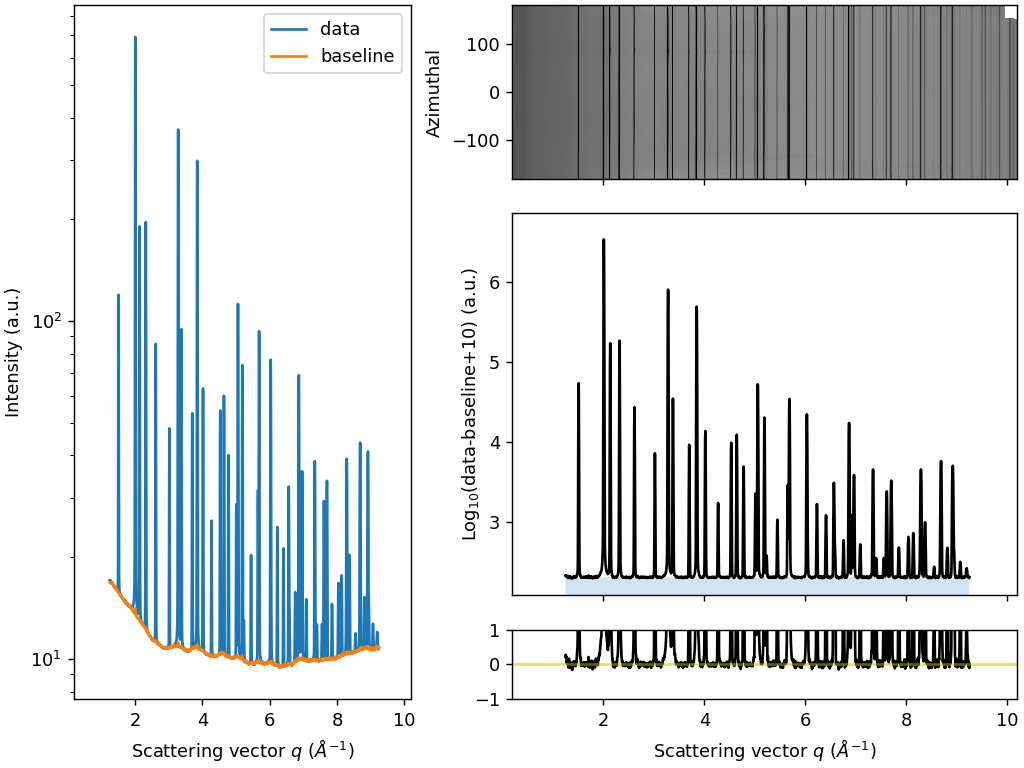

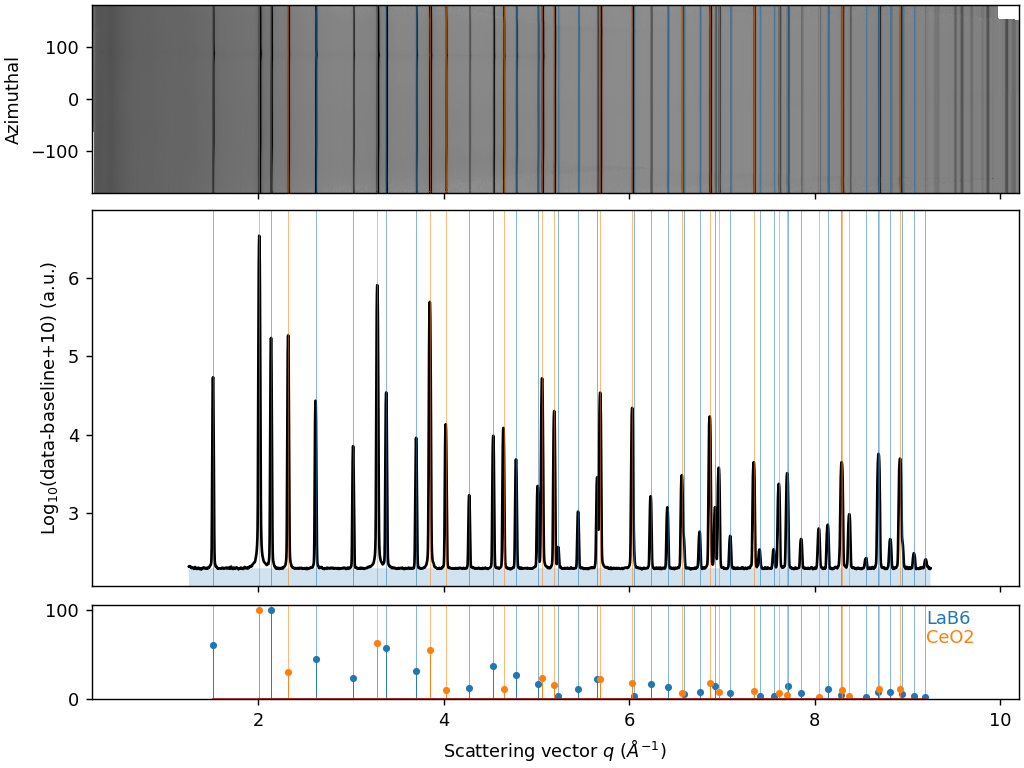

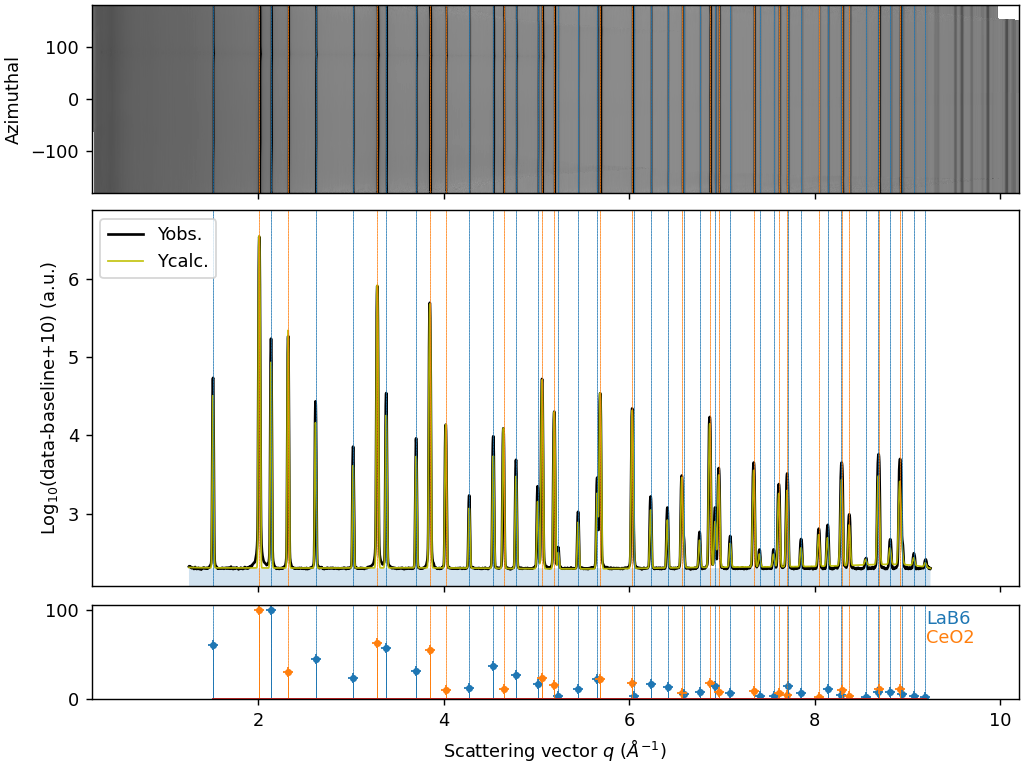

In [15]:

sample_mix.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    roi_radial_range=[1.25,9.25],
                    # roi_azimuthal_range=[0,90],
                    plot=True)

sample_mix.load_phases(phases=phases_mix,plot=True)


sample_mix.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')

sample_mix.refine_background()
sample_mix.refine_size_broadening()
sample_mix.refine_strain_broadening()

sample_mix.plot_refinement()


Rwp from 1st refinement is = 11.019 
 

Background is refined. Rwp is now 7.471 (was 11.019)

Size broadening of all phases are refined. Rwp is now 7.172 (was 7.471)

Strain broadening of all phases are refined. Rwp is now 7.158 (was 7.172)


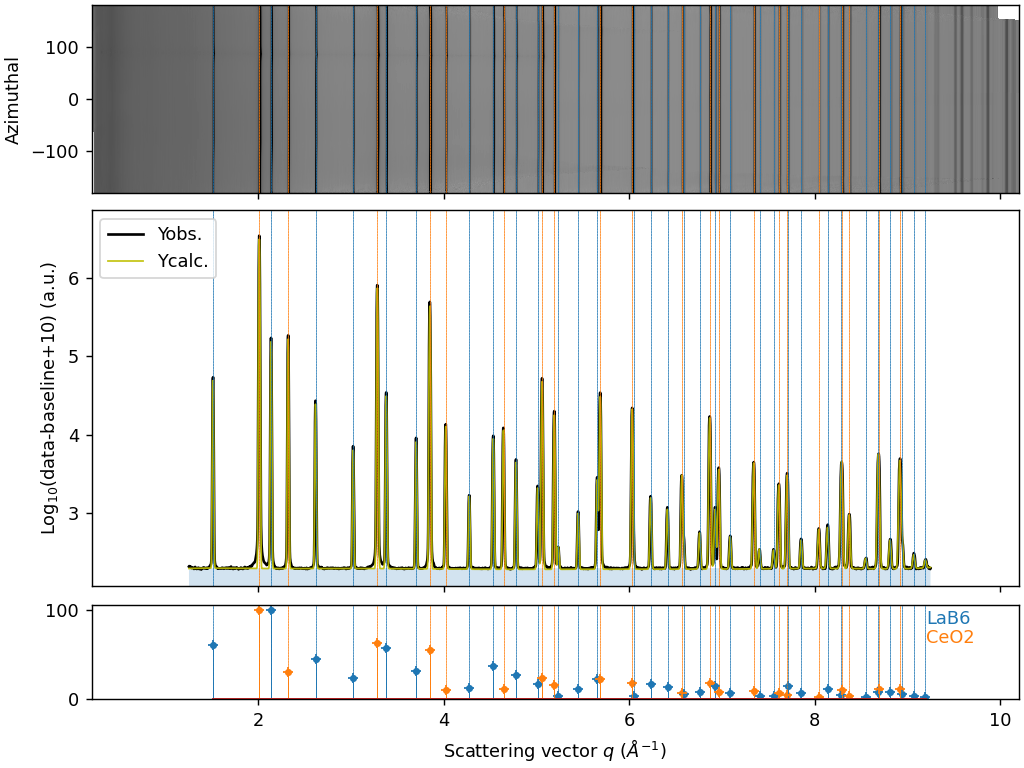

In [17]:
sample_mix.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')

sample_mix.set_LeBail()
sample_mix.refine_background()
sample_mix.refine_size_broadening()
sample_mix.refine_strain_broadening()

sample_mix.plot_refinement()